# **Milestone 2: TensorFlow Model Architecture and Training Module**
### 1. **Dataset Loading and Overview**: 
##### > Load the dataset and inspect the first few rows to understand the data structure.

In [3]:
import pandas as pd

# Load the dataset
file_path = 'Shahir_Basha_Kadiri_Final_cleaned_dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   type    amount  oldbalanceOrg  newbalanceOrig   isFraud
0     0  0.002432       0.018398        0.023652  No Fraud
1     3  0.000401       0.005692        0.006586  No Fraud
2     4  0.000727       0.000384        0.000000     Fraud
3     4  0.005805       0.003067        0.000000     Fraud
4     1  0.150521       0.079521        0.000000     Fraud


### **2. Data Splitting for Model Training, Validation, and Testing:**
##### > Split the dataset into training, validation, and test sets to prevent overfitting and enable model evaluation.
##### > Typical split ratios: 70% for training, 15% for validation, 15% for testing.

In [6]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = data.drop(columns=['isFraud'])  # Features (all columns except target)
y = data['isFraud']  # Target variable

# Split the dataset into training (70%), validation (15%), and testing (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)  # 70% train, 30% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)  # 50% of temp for val and test

# Output the shapes of the datasets
print("\nShapes of the datasets:")
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Testing set:", X_test.shape, y_test.shape)


Shapes of the datasets:
Training set: (11498, 4) (11498,)
Validation set: (2464, 4) (2464,)
Testing set: (2464, 4) (2464,)


### **3. Data Distribution Visualization**
##### > Visualize the distribution of Fraud and Non-Fraud cases across datasets.

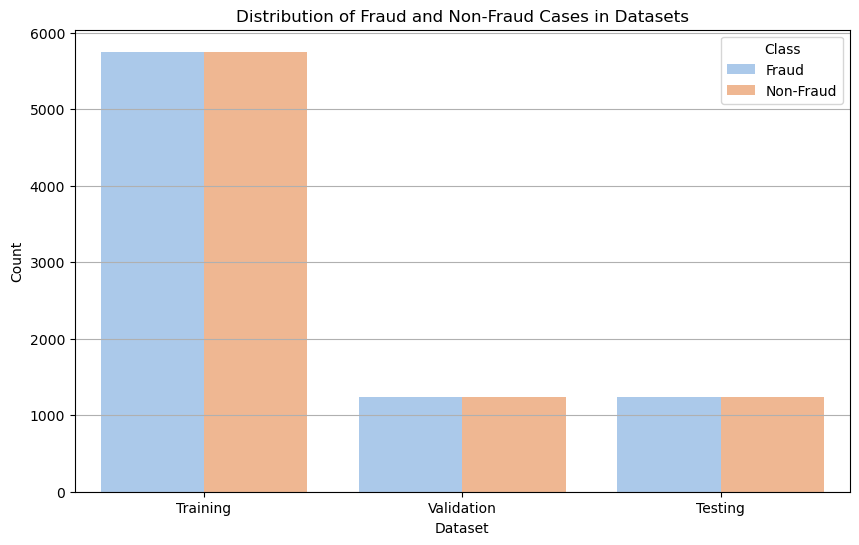

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame to store the counts for plotting
data_counts = {
    'Set': ['Training', 'Validation', 'Testing'],
    'Fraud': [y_train.value_counts().iloc[1], y_val.value_counts().iloc[1], y_test.value_counts().iloc[1]],
    'Non-Fraud': [y_train.value_counts().iloc[0], y_val.value_counts().iloc[0], y_test.value_counts().iloc[0]]
}

counts_df = pd.DataFrame(data_counts)

# Melt the DataFrame for easier plotting with Seaborn
melted_counts = counts_df.melt(id_vars='Set', var_name='Class', value_name='Count')

# Set the color palette for better visualization
sns.set_palette("pastel")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Set', y='Count', hue='Class', data=melted_counts)
plt.title('Distribution of Fraud and Non-Fraud Cases in Datasets')
plt.xlabel('Dataset')
plt.ylabel('Count')
plt.legend(title='Class')
plt.xticks(rotation=0)
plt.grid(axis='y')

# Show the plot
plt.show()


### **4. Evaluating Multiple Models for Comparison**
##### > Evaluate different machine learning models for a baseline performance comparison.

In [12]:
import sys
print(sys.executable)

C:\Users\shahi\anaconda3\python.exe


#### **a) Installing XGBoost**

In [106]:
!pip install xgboost

#### **b) Installing LightGBM**

In [126]:
!pip install lightgbm

#### **c) Performance Metrics of Various ML Models for Fraud Detection**

In [16]:
# Step 1: Import libraries 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb

# Assume X_train, X_val, X_test, y_train, y_val, y_test are already defined

# Step 2: Convert target labels to numeric format
y_train_numeric = np.where(y_train == 'Fraud', 1, 0)
y_val_numeric = np.where(y_val == 'Fraud', 1, 0)

# Step 3: Define a function to evaluate models
def evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, pos_label=1)  
    recall = recall_score(y_val, y_pred, pos_label=1)        
    f1 = f1_score(y_val, y_pred, pos_label=1)               
    return accuracy, precision, recall, f1

# Step 4: Evaluate multiple algorithms
algorithms = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Classifier': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': lgb.LGBMClassifier()
}

results = []

for name, model in algorithms.items():
    metrics = evaluate_model(model, X_train, y_train_numeric, X_val, y_val_numeric)
    results.append([name] + list(metrics))

# Step 5: Create a DataFrame for results
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Display the results
print(results_df)

# Optional: Sort the results by F1-Score
results_df.sort_values(by='F1-Score', ascending=False, inplace=True)
print("\nSorted Results:")
print(results_df)


C:\Users\shahi\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:15:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 5749, number of negative: 5749
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000995 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 770
[LightGBM] [Info] Number of data points in the train set: 11498, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
                       Model  Accuracy  Precision    Recall  F1-Score
0              Decision Tree  0.995130   0.994327  0.995942  0.995134
1              Random Forest  0.995942   0.995138  0.996753  0.995945
2        Logistic Regression  0.796266   0.897603  0.668831  0.766512
3  Support Vector Classifier  0.787744   0.701994  1.000000  0.824908
4        K-Nearest Neighbors  0.993101   0.988737  0.997565  0.993131
5                    XGBoost  0.997159   0.997563  0.996753  0.997158
6                   LightGBM  0.997159   0.997563  0.996753  0.997158

Sort

#### **d) Visualizing Model Performance**

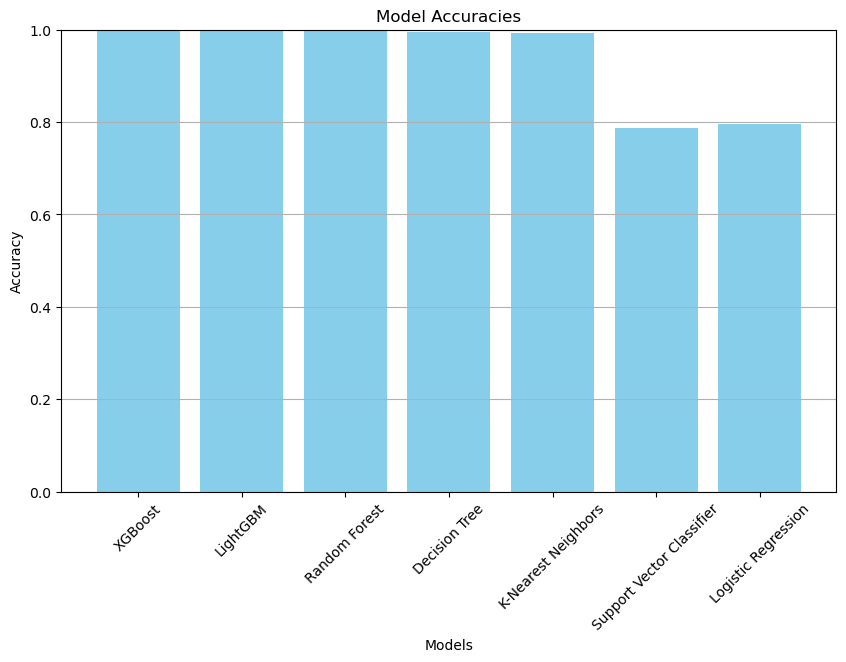

In [18]:
# Import libraries for visualization
import matplotlib.pyplot as plt

# Step 1: Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Accuracy'], color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.xticks(rotation=45)
plt.ylim([0, 1])
plt.grid(axis='y')

# Step 2: Display the bar chart
plt.show()


### **5. Encoding Labels**
##### > Encode the labels as binary values for model training.
##### > Ensure proper handling of target labels for training and testing.

In [52]:
# Encode the labels as 1 and 0
y_train_encoded = y_train.map({'Fraud': 1, 'No Fraud': 0})
y_test_encoded = y_test.map({'Fraud': 1, 'No Fraud': 0})


In [54]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import xgboost as xgb


In [56]:
# Example labels - ensure you replace these with your actual labels
# y_train = ... (your training labels)

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder and transform the labels
y_train_encoded = label_encoder.fit_transform(y_train)  # For training labels
y_test_encoded = label_encoder.transform(y_test)        # For test labels

# Check the encoded labels
print("Encoded training labels:", y_train_encoded)
print("Encoded test labels:", y_test_encoded)


Encoded training labels: [0 1 0 ... 1 1 0]
Encoded test labels: [1 0 1 ... 0 0 1]


### **6. Hyperparameter Tuning with GridSearchCV**
##### > Define an XGBoost model and set up a parameter grid for tuning.
##### > Perform grid search to find the best hyperparameters.

In [58]:
# Define the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'min_child_weight': [1, 3, 5]
}


In [60]:
# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, 
                           param_grid=param_grid, 
                           scoring='f1', 
                           cv=5, 
                           verbose=2, 
                           n_jobs=-1)


In [62]:
# Fit the grid search to the training data with encoded labels
grid_search.fit(X_train, y_train_encoded)

# Get the best model and parameters
best_xgb_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\shahi\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:47:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 300, 'subsample': 0.8}


### **7. Final Evaluation of the Best Model**
##### > Make Predictions: Use the best XGBoost model to predict the outcomes on the test set.
##### > Evaluate Performance: Calculate accuracy, print the classification report, and display the confusion matrix.

In [94]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set using the best model
y_pred = best_xgb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:\n", classification_report(y_test_encoded, y_pred))

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred))


Accuracy: 0.9926948051948052
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1232
           1       1.00      0.99      0.99      1232

    accuracy                           0.99      2464
   macro avg       0.99      0.99      0.99      2464
weighted avg       0.99      0.99      0.99      2464

Confusion Matrix:
 [[1226    6]
 [  12 1220]]


### **8. Defining the Neural Network Model**
##### > Create a Sequential model with input, hidden, and output layers tailored for binary classification tasks.
##### > Compile the model using the Adam optimizer and binary cross-entropy loss function for effective training.

In [66]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the model architecture
def create_model(input_shape):
    model = keras.Sequential()
    
    # Input layer
    model.add(layers.InputLayer(input_shape=input_shape))

    # Hidden layers
    model.add(layers.Dense(128, activation='relu'))  # First hidden layer
    model.add(layers.Dropout(0.5))                   # Dropout layer to prevent overfitting
    model.add(layers.Dense(64, activation='relu'))   # Second hidden layer
    model.add(layers.Dropout(0.5))                   # Another Dropout layer
    model.add(layers.Dense(32, activation='relu'))   # Third hidden layer

    # Output layer
    model.add(layers.Dense(1, activation='sigmoid'))  # For binary classification
    
    # Compile the model
    model.compile(optimizer='adam', 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    
    return model

# Example input shape (number of features in your dataset)
input_shape = (X_train.shape[1],)  # Adjust according to your feature set
model = create_model(input_shape)

# Summary of the model architecture
model.summary()


C:\Users\shahi\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,009 (43.00 KB)

 Trainable params: 11,009 (43.00 KB)

 Non-trainable params: 0 (0.00 B)

### **9. Training the Neural Network Model**
##### > Transform the target variable into a format suitable for model training.
##### > Implement a callback to prevent overfitting by monitoring validation loss.

In [68]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder and transform the target variable
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

# Optional: Check the unique values
print("Unique values in y_train_encoded:", set(y_train_encoded))
print("Unique values in y_val_encoded:", set(y_val_encoded))

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',          # Monitor the validation loss
    patience=5,                  # Stop after 5 epochs with no improvement
    restore_best_weights=True    # Restore the best model weights
)

# Train the model with encoded labels and EarlyStopping callback
history = model.fit(
    X_train, y_train_encoded,
    validation_data=(X_val, y_val_encoded),  # Validation set
    epochs=50,                               # Number of epochs
    batch_size=32,                           # Batch size
    callbacks=[early_stopping],              # Early stopping callback
    verbose=1                                # Verbosity level
)


Unique values in y_train_encoded: {0, 1}
Unique values in y_val_encoded: {0, 1}
Epoch 1/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5802 - loss: 0.6568 - val_accuracy: 0.6088 - val_loss: 0.5962
Epoch 2/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6175 - loss: 0.5846 - val_accuracy: 0.6441 - val_loss: 0.5577
Epoch 3/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7037 - loss: 0.5241 - val_accuracy: 0.8064 - val_loss: 0.4301
Epoch 4/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7852 - loss: 0.4543 - val_accuracy: 0.8551 - val_loss: 0.3550
Epoch 5/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8254 - loss: 0.3921 - val_accuracy: 0.8571 - val_loss: 0.3151
Epoch 6/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8340 - loss: 0.3705 - val_accuracy: 0.8624 - val_loss: 0.3004
Epoch 7/50
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8417 - loss: 0.3416 - val_accuracy: 0.8616 - val_loss: 0.2977
Epoch 8/50
360/360 ━━━━━

### **10. Model Persistence Using Joblib**
##### > Ensure that joblib is installed.


In [72]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


##### > Saving the Model: Save the trained model to a file.

In [74]:
import joblib

# Assuming 'model' is your trained model
model_filename = 'fraud_detection_model.pkl'  # Change the name as needed
joblib.dump(model, model_filename)

print(f"Model saved to {model_filename}")


Model saved to fraud_detection_model.pkl


##### > Generate a link for downloading the saved model.

In [78]:
from IPython.display import FileLink

# Create a download link for the model
FileLink('fraud_detection_model.pkl')

C:\Users\shahi\fraud_detection_model.pkl

### **11. Label Encoding and Persistence**
##### > Create and fit the LabelEncoder for the target labels.
##### > Store the encoder for future use.

In [80]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Initialize and fit the LabelEncoder
label_encoder = LabelEncoder()

# Assuming y_train contains your target labels
y_train_encoded = label_encoder.fit_transform(y_train)

# Save the LabelEncoder
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

##### > Load the necessary libraries for model loading and data handling.

In [82]:
# Load the trained model and the label encoder
model = joblib.load('fraud_detection_model.pkl')
label_encoder = joblib.load('label_encoder.pkl')  # Make sure this file exists


### **12. Function for Fraud Prediction**
##### > Create a function to handle user input and make predictions.
##### > Prompt the user for transaction details.
##### > Structure the input data for the model.
##### > Use the model to predict if the transaction is fraudulent.
##### > Display whether the transaction is fraudulent or not.

In [90]:
import pandas as pd
import joblib

# Load the trained model and label encoder
model = joblib.load('fraud_detection_model.pkl')  # Adjust the model file name accordingly
label_encoder = joblib.load('label_encoder.pkl')  # Load the label encoder

def predict_fraud():
    # Get user input for the specified features
    transaction_type = input("Enter transaction type (e.g., 'CASH_IN', 'CASH_OUT', etc.): ")
    amount = float(input("Enter transaction amount (e.g., 379057.93): "))
    oldbalance_org = float(input("Enter old balance origin (oldbalanceOrg): "))  # Old balance as float
    newbalance_orig = float(input("Enter new balance origin (newbalanceOrig): "))  # New balance as float

    # Prepare the input data for the model
    input_data = {
        'type': transaction_type,
        'amount': amount,
        'oldbalanceOrg': oldbalance_org,
        'newbalanceOrig': newbalance_orig
    }

    # Convert the input data into a DataFrame
    input_df = pd.DataFrame([input_data])

    # Handle unseen labels for transaction type
    if transaction_type not in label_encoder.classes_:
        print(f"Warning: {transaction_type} is an unseen label. It will be treated as a new category.")
        transaction_type_encoded = -1  # Assign a default value for unseen labels
    else:
        transaction_type_encoded = label_encoder.transform([transaction_type])[0]

    # Update the input DataFrame with the encoded type
    input_df['type'] = transaction_type_encoded

    # Ensure all columns are in the same order as during training
    input_df = input_df[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig']]

    # Make predictions
    prediction = model.predict(input_df)

    # Output the prediction
    if prediction[0] == 1:
        print("Transaction is fraudulent.")
    else:
        print("Transaction is not fraudulent.")

# Run the function to make a prediction
predict_fraud()


Enter transaction type (e.g., 'CASH_IN', 'CASH_OUT', etc.):  'TRANSFER'
Enter transaction amount (e.g., 379057.93):  22877
Enter old balance origin (oldbalanceOrg):  22877
Enter new balance origin (newbalanceOrig):  0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
Transaction is not fraudulent.
